      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-nu

/var/folders/cy/ymygl9wx44n__4jnpzrvdmpc0000gn/T/ipykernel_2090/2954107703.py:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')


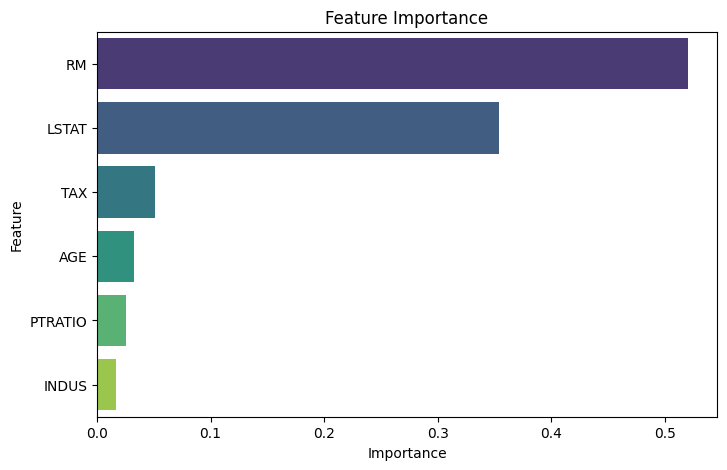

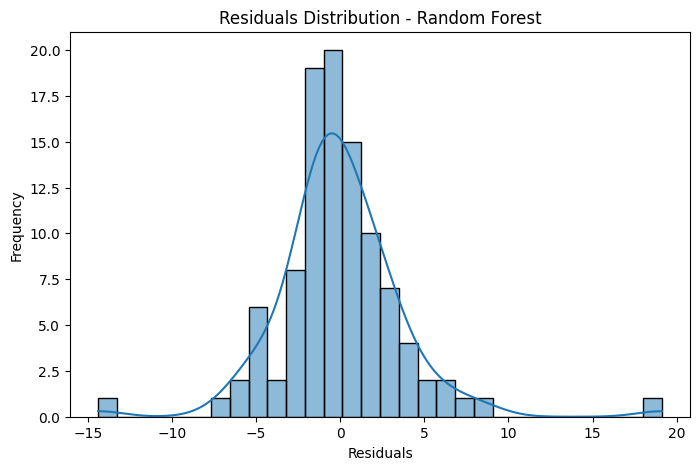

Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Model saved as best_rf_model.pkl

Loaded Random Forest Model Performance:
MAE: 0.00K
RMSE: 0.00K
R2 Score: 0.81


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

# Load dataset
df = pd.read_csv('boston.csv')

# Display basic info
print(df.head())
print(df.info())

# Handling missing values
df.fillna(df.mean(), inplace=True)

# Selecting numerical features
num_features = df.select_dtypes(include=[np.number]).columns.tolist()

# Feature selection
selected_features = ['RM', 'LSTAT', 'PTRATIO', 'INDUS', 'TAX', 'AGE']
X = df[selected_features]
y = df['MEDV']

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Train Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Model Evaluation
# Updated Model Evaluation Function
def evaluate_model(y_test, y_pred, model_name):
    print(f'\n{model_name} Performance:')
    print(f'MAE: {mean_absolute_error(y_test, y_pred) / 1000:.2f}K')
    print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)) / 1000:.2f}K')
    print(f'R2 Score: {r2_score(y_test, y_pred):.2f}')


evaluate_model(y_test, y_pred_lr, 'Linear Regression')
evaluate_model(y_test, y_pred_rf, 'Random Forest')

# Feature Importance from Random Forest
importances = rf.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': selected_features, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(8,5))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importance')
plt.show()

# Residual Analysis
plt.figure(figsize=(8,5))
sns.histplot(y_test - y_pred_rf, bins=30, kde=True)
plt.title('Residuals Distribution - Random Forest')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Hyperparameter Tuning for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, n_jobs=-1)
grid_search.fit(X_train, y_train)
print(f'Best Parameters: {grid_search.best_params_}')

# Save the model
joblib.dump(grid_search.best_estimator_, 'best_rf_model.pkl')
print('Model saved as best_rf_model.pkl')

# Load and test saved model
loaded_model = joblib.load('best_rf_model.pkl')
y_pred_loaded = loaded_model.predict(X_test)
evaluate_model(y_test, y_pred_loaded, 'Loaded Random Forest Model') 


In [9]:
# Define the new house's features
new_house = pd.DataFrame({'RM': [6.8], 'LSTAT': [10.2], 'PTRATIO': [18.0], 
  'INDUS': [7.5], 'TAX': [320], 'AGE': [65]})

# Scale the features using the previously fitted scaler
new_house_scaled = scaler.transform(new_house)
# Make a prediction
predicted_price = rf.predict(new_house_scaled)

print(f'Predicted House Price: ${predicted_price[0]*1000:.2f}')


Predicted House Price: $24408.00
